In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import warnings

In [6]:
data = pd.read_csv('car_price_prediction.csv')
data.tail()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels
19232,3606,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4,Manual,Rear
19233,6747,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4,Tiptronic,Front
19234,9795,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4,Automatic,Front
19235,5980,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4,Automatic,Front
19236,7056,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923,4,Automatic,Front


In [7]:
# Clean 'Engine volume' column (e.g., remove " Turbo" suffix if present)
data['Engine volume'] = data['Engine volume'].str.replace(' Turbo', '', regex=False).astype(float)


In [8]:
data.tail()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels
19232,3606,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4,Manual,Rear
19233,6747,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4,Tiptronic,Front
19234,9795,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4,Automatic,Front
19235,5980,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4,Automatic,Front
19236,7056,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923,4,Automatic,Front


In [9]:

print(data.isnull().sum())


Price               0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
dtype: int64


In [10]:
# List of categorical columns
categorical_columns = ['Manufacturer', 'Model', 'Category', 'Leather interior', 
                       'Fuel type', 'Gear box type', 'Drive wheels']

# Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


In [11]:
data_encoded.head()

,Price,Prod. year,Engine volume,Mileage,Cylinders,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,Manufacturer_AUDI,Manufacturer_BENTLEY,Manufacturer_BMW,...,Fuel type_Hybrid,Fuel type_Hydrogen,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_Front,Drive wheels_Rear
0,8001,2010,3.5,186005,6,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,8624,2011,3.0,192000,6,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,4233,2006,1.3,200000,4,False,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False
3,8624,2011,2.5,168966,4,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,8701,2014,1.3,91901,4,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [12]:
# Define target and features
X = data_encoded.drop('Price', axis=1)
y = data_encoded['Price']


In [21]:
X = (X - X.mean()) / X.std()

# Add a bias column (intercept term)
X['bias'] = 1

In [22]:
# Convert to numpy arrays
X = X.values
y = y.values

# Initialize weights (including bias) to 0
theta = np.zeros(X.shape[1])

# Define learning rate and number of iterations
learning_rate = 0.01
iterations = 1000


In [23]:
def compute_cost(X, y, theta):
    m = len(y)  
    predictions = X.dot(theta)  
    errors = predictions - y  
    cost = (1 / (2 * m)) * np.sum(errors ** 2) 
    return cost


In [24]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        predictions = X.dot(theta)  
        errors = predictions - y  
        gradient = (1 / m) * X.T.dot(errors)  
        theta -= learning_rate * gradient  
        cost = compute_cost(X, y, theta)  
        cost_history.append(cost)  

    return theta, cost_history


In [25]:
# Train the model
theta_optimal, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

# Print optimal weights and final cost
print("Optimal weights:", theta_optimal)
print("Final cost:", cost_history[-1])


Optimal weights: [ 4669.51668124  -482.17284573    14.40763974 ...   127.47617903
   269.73667515 10636.99790759]
Final cost: 12179701.259341402


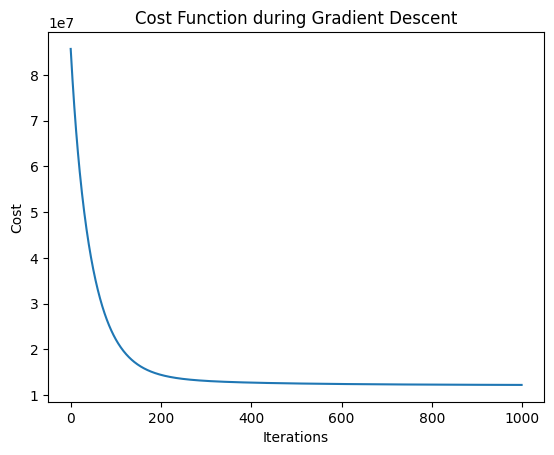

In [26]:
# Plot cost history
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function during Gradient Descent')
plt.show()


In [27]:
# Predict on training data
predictions = X.dot(theta_optimal)

# Compare actual and predicted prices
print("Actual prices:", y[:10])
print("Predicted prices:", predictions[:10])


Actual prices: [ 8001  8624  4233  8624  8701 19748  5802  7028  5913  4123]
Predicted prices: [12429.50770841 14829.82606844  5275.05587555  9718.96471371
 11604.98486183 21328.14012009  6250.5469283   8339.30139885
  8543.19357    10809.40562527]


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 2848.950593877419
Mean Squared Error: 24359402.518682804
R² Score: 0.6067102731145702


In [13]:
# Define target and features
X = data.drop(columns=['Price'])
y = data['Price']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Define categorical and numerical features
categorical_features = ['Manufacturer', 'Model', 'Category', 'Leather interior',
                        'Fuel type', 'Gear box type', 'Drive wheels']
numerical_features = ['Prod. year', 'Mileage', 'Cylinders', 'Engine volume']


In [16]:

# Preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)


In [17]:
# Create a pipeline with preprocessing and model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42, n_estimators=100))
])


In [18]:
# Train the model
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Prod. year', 'Mileage',
                                                   'Cylinders',
                                                   'Engine volume']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Manufacturer', 'Model',
                                                   'Category',
                                                   'Leather interior',
                                                   'Fuel type', 'Gear box type',
                                                   'Drive wheels'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [20]:
warnings.filterwarnings('ignore')

# Predict on the test set
y_pred = model_pipeline.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 179.1833445945946
Mean Squared Error (MSE): 2670865.116420868
Root Mean Squared Error (RMSE): 1634.2781637227085
R² Score: 0.9535398633463285


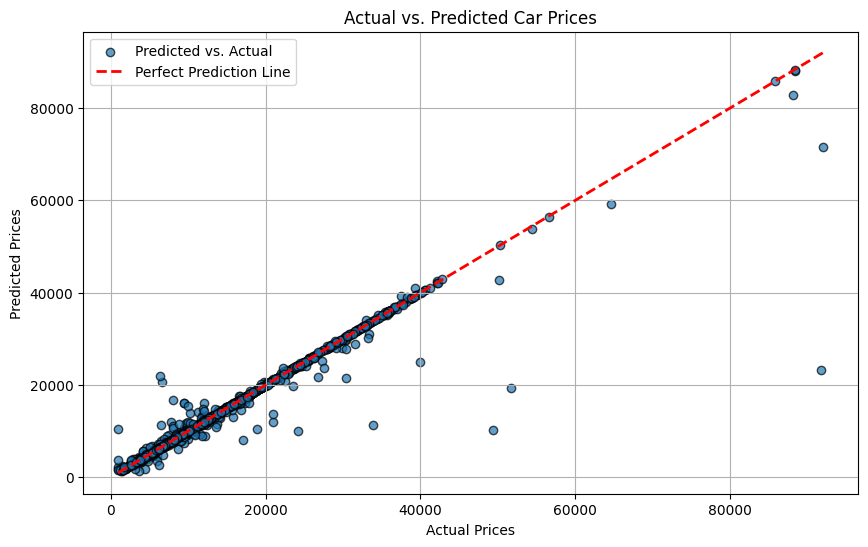

In [21]:
# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k', label="Predicted vs. Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction Line")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Car Prices')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

linear_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Prod. year', 'Mileage',
                                                   'Cylinders',
                                                   'Engine volume']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Manufacturer', 'Model',
                                                   'Category',
                                                   'Leather interior',
                                                   'Fuel type', 'Gear box type',
                                                   'Drive wheels'])])),
                ('model', LinearRegression())])

In [24]:
warnings.filterwarnings('ignore')
# Predict on the test set
y_pred_linear = linear_pipeline.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("LinearRegression Results:")
print(f"Mean Absolute Error: {mae_linear:.2f}")
print(f"R² Score: {r2_linear}")



LinearRegression Results:
Mean Absolute Error: 3217.85
R² Score: 0.43007470708233886


In [25]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42))
])
decision_tree_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Prod. year', 'Mileage',
                                                   'Cylinders',
                                                   'Engine volume']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Manufacturer', 'Model',
                                                   'Category',
                                                   'Leather interior',
                                                   'Fuel type', 'Gear box type',
                                                   'Drive wheels'])])),
                ('model', DecisionTreeRegressor(random_state=42))])

In [26]:
warnings.filterwarnings('ignore')
# Predict on the test set
y_pred_tree = decision_tree_pipeline.predict(X_test)

mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("DecisionTreeRegressor Results:")
print(f"Mean Absolute Error: {mae_tree:.2f}")
print(f"R² Score: {r2_tree:.2f}")


DecisionTreeRegressor Results:
Mean Absolute Error: 171.64
R² Score: 0.94


In [55]:
# Save the pipeline (including feature metadata)
joblib.dump(model_pipeline, 'car_price_model.pkl')
print("Model saved as 'car_price_model.pkl'")

Model saved as 'car_price_model.pkl'


In [52]:
def predict_car_price(car_details, model_pipeline):
    """
    Predicts the price of a car based on input details.

    Parameters:
    - car_details (dict): A dictionary containing car details.
    - model_pipeline: A trained model pipeline for prediction.

    Returns:
    - dict: Predicted price.
    """
    try:
        # Convert input to a DataFrame
        input_data = pd.DataFrame([car_details])

        # Ensure all required columns are present by renaming them
        input_data = input_data.rename(columns={
            'Prod_year': 'Prod. year',
            'Fuel_type': 'Fuel type',
            'Gear_box_type': 'Gear box type',
            'Leather_interior': 'Leather interior',
            'Engine_volume': 'Engine volume',
            'Drive_wheels': 'Drive wheels'
        })

        # Check if all required columns are present in the input data
        required_columns = ['Prod. year', 'Mileage', 'Cylinders', 'Engine volume', 'Manufacturer',
                            'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels']
        
        missing_columns = set(required_columns) - set(input_data.columns)
        if missing_columns:
            raise ValueError(f"Missing columns: {', '.join(missing_columns)}")

        # Predict using the pipeline
        predicted_price = model_pipeline.predict(input_data)[0]
        return {"predicted_price": round(predicted_price, 2)}
    
    except Exception as e:
        return {"error": str(e)}


In [56]:
# Example car details
test_car = {
    "Prod_year": 2016,
    "Mileage": 76000,
    "Cylinders": 4,
    "Engine_volume": 2.0,
    "Manufacturer": "HYUNDAI",
    "Model": "Santa FE",
    "Category": "Jeep",
    "Leather_interior": "Yes",
    "Fuel_type": "Diesel",
    "Gear_box_type": "Automatic",
    "Drive_wheels": "Front"
}

# Load the pre-trained model pipeline
model_pipeline = joblib.load('car_price_model.pkl')

# Test the prediction
prediction = predict_car_price(test_car, model_pipeline)
print(prediction)


{'predicted_price': np.float64(29464.28)}
